# Decision Tree Classification

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [109]:
df = pd.read_csv('F:\Machine Learning\Task\HW2.csv')
df.head()

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [110]:
df.describe()

,S.No,plod,gender,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   plod               1946 non-null   float64
 2   name               1946 non-null   object 
 3   title              938 non-null    object 
 4   gender             1946 non-null   int64  
 5   culture            677 non-null    object 
 6   dateOfBirth        433 non-null    float64
 7   DateoFdeath        444 non-null    float64
 8   mother             21 non-null     object 
 9   father             26 non-null     object 
 10  heir               23 non-null     object 
 11  house              1519 non-null   object 
 12  spouse             276 non-null    object 
 13  book1              1946 non-null   int64  
 14  book2              1946 non-null   int64  
 15  book3              1946 non-null   int64  
 16  book4              1946 

In [112]:
df.isnull().sum()

S.No                    0
plod                    0
name                    0
title                1008
gender                  0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [113]:
(1008/1946)*100

51.798561151079134

In [114]:
df1  = df.drop(['title','culture','dateOfBirth','DateoFdeath','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','age'],axis = 1)

In [115]:
df1.head()

,S.No,plod,name,gender,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,2,0.613,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,3,0.507,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0,0.043478,1


In [116]:
df1.isnull().sum()

S.No                   0
plod                   0
name                   0
gender                 0
house                427
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
numDeadRelations       0
boolDeadRelations      0
isPopular              0
popularity             0
isAlive                0
dtype: int64

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   plod               1946 non-null   float64
 2   name               1946 non-null   object 
 3   gender             1946 non-null   int64  
 4   house              1519 non-null   object 
 5   book1              1946 non-null   int64  
 6   book2              1946 non-null   int64  
 7   book3              1946 non-null   int64  
 8   book4              1946 non-null   int64  
 9   book5              1946 non-null   int64  
 10  isMarried          1946 non-null   int64  
 11  isNoble            1946 non-null   int64  
 12  numDeadRelations   1946 non-null   int64  
 13  boolDeadRelations  1946 non-null   int64  
 14  isPopular          1946 non-null   int64  
 15  popularity         1946 non-null   float64
 16  isAlive            1946 

In [118]:
x = df1.iloc[:,[3,10,11,12,13,14]]
y = df1.iloc[:,16]
y.head()

0    0
1    1
2    1
3    0
4    1
Name: isAlive, dtype: int64

In [119]:
print('X shape -',x.shape)
print('Y shape -',y.shape)

X shape - (1946, 6)
Y shape - (1946,)


# Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 51)
print('X_train Shape -',x_train.shape)
print('X_test Shape -',x_test.shape)
print('Y_train Shape -',y_train.shape)
print('Y_test Shape -',y_test.shape)

X_train Shape - (1459, 6)
X_test Shape - (487, 6)
Y_train Shape - (1459,)
Y_test Shape - (487,)


In [122]:
from sklearn.impute import SimpleImputer

In [123]:
df1.shape

(1946, 17)

In [124]:
num_vars = x_train.select_dtypes(include=['int64','float64'])
num_vars.head()

,gender,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular
574,1,1,1,0,0,0
535,1,0,1,0,0,0
1755,1,0,1,0,0,0
847,1,0,0,0,0,0
744,1,0,1,0,0,0


In [125]:
num_vars.isnull().sum()

gender               0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
dtype: int64

In [126]:
char_vars = x_train.select_dtypes(include=['object'])
char_vars.head()

""
574
535
1755
847
744


In [127]:
char_vars.isnull().sum()

Series([], dtype: float64)

In [128]:
x_train.head()

,gender,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular
574,1,1,1,0,0,0
535,1,0,1,0,0,0
1755,1,0,1,0,0,0
847,1,0,0,0,0,0
744,1,0,1,0,0,0


In [129]:
y_train.head()

574     0
535     1
1755    0
847     1
744     1
Name: isAlive, dtype: int64

# Apply Decision Tree Classifier

In [130]:
df1.head()

,S.No,plod,name,gender,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,2,0.613,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,3,0.507,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0,0.043478,1


### Male vs Female visualization

In [131]:
import seaborn as sns

In [132]:
df1_f = df1[df1['gender']==1]
df1_f.shape

(1205, 17)

In [133]:
df1_m = df1[df1['gender']==0]
df1_m.shape

(741, 17)

<AxesSubplot:xlabel='gender', ylabel='Count'>

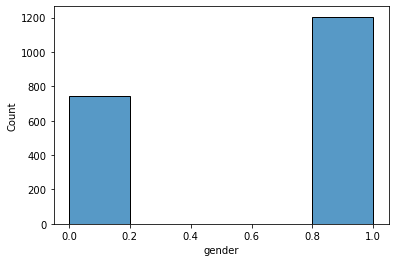

In [134]:
sns.histplot(df1['gender'],bins = 5)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

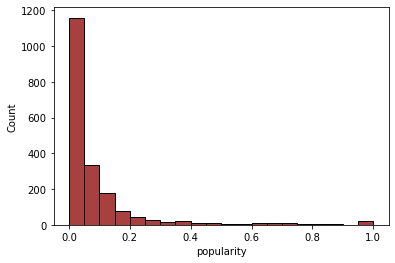

In [135]:
sns.histplot(df1['popularity'],bins=20,color='darkred')

In [136]:
df_alive = df1[df1['isAlive']==1]
df_alive.shape

(1451, 17)

In [137]:
df_dead = df1[df1['isAlive']==0]
df_dead.shape

(495, 17)

<AxesSubplot:xlabel='isAlive', ylabel='Count'>

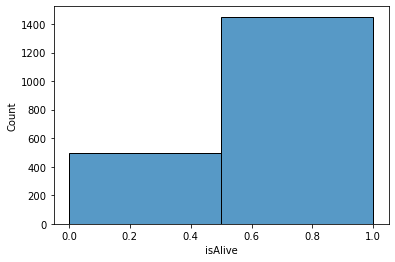

In [138]:
sns.histplot(df['isAlive'],bins=2)

# Importing Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

In [166]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

### Prediction

In [167]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [168]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 18,  93],
       [ 12, 364]], dtype=int64)

In [169]:
total_cm = 18+93+12+364
total_cm

487

In [170]:
((18+364)/total_cm)*100

78.4394250513347

In [171]:
x_test.shape

(487, 6)

In [172]:
accuracy_score(y_pred,y_test)*100

78.4394250513347

In [179]:
v = [[1,1,1,4,1,0]]
dtc.predict(v)

array([0], dtype=int64)

In [180]:
x.tail()

,gender,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular
1941,1,0,0,0,0,1
1942,1,0,0,0,0,0
1943,1,0,0,0,0,0
1944,1,0,0,0,0,0
1945,1,1,1,4,1,0


In [181]:
df1.tail()

,S.No,plod,name,gender,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1941,1942,0.197,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,1,0.351171,0
1942,1943,0.013,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0,0.096990,0
1943,1944,0.480,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0,0.030100,1
1944,1945,0.363,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0,0.130435,1
1945,1946,0.907,Tytos Lannister,1,House Lannister,0,0,1,1,1,1,1,4,1,0,0.210702,0
